In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import ctypes

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.facecolor'] = 'w'

libfec = ctypes.CDLL('libfec.so')

In [2]:
def strhex(x):
    if type(x) == np.ndarray:
        x = bytes(x)
    h = x.hex()
    s = ''
    count = 0
    per_row = 16
    for a, b in zip(h[::2], h[1::2]):
        s += f'{a}{b} '
        if count % per_row == per_row - 1:
            s += '\n'
        count += 1
    return s

In [3]:
rs_size = 252
padding = 255 - rs_size
frames = np.fromfile('queqiao_rs_frames.u8', dtype='uint8').reshape((-1, rs_size))

In [4]:
rs_decode_errors = np.array([libfec.decode_rs_ccsds(bytes(f), 0, 0, padding) for f in frames])

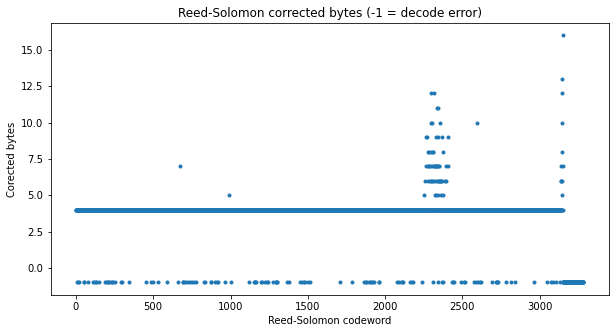

In [5]:
plt.plot(rs_decode_errors, '.')
plt.title('Reed-Solomon corrected bytes (-1 = decode error)')
plt.xlabel('Reed-Solomon codeword')
plt.ylabel('Corected bytes');

In [6]:
good_frames = rs_decode_errors == 4

In [7]:
decodes = []
for f in frames[good_frames]:
    frame = bytes(f)
    libfec.decode_rs_ccsds(frame, 0, 0, padding)
    decodes.append(np.frombuffer(frame, 'uint8'))
decodes = np.array(decodes)

In [8]:
print(strhex(frames[good_frames][0]))

03 79 16 0a 32 98 02 81 27 55 9a aa bb 02 c5 00 
00 f9 6b 00 00 00 00 a4 09 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
21 00 28 00 3e a7 02 20 ee 58 01 04 08 24 00 00 
63 00 00 00 62 00 00 00 07 92 92 00 00 db cf 25 
53 0f 00 00 08 c6 02 3b 12 95 0c 0c 30 23 fe f0 
58 28 ca 53 1a 10 1f 35 ac 4f da f8 00 00 00 00 
00 00 00 00 00 00 00 00 0f 38 2a 29 d9 49 07 07 
f9 0d 00 00 00 00 00 00 80 49 04 43 00 00 00 00 
ae 7f af ae ac af 00 00 00 00 04 04 ff c1 00 ff 
11 00 96 55 ff 01 01 01 01 01 01 01 01 01 01 76 
8f 80 02 01 01 01 01 01 01 01 01 01 01 01 01 01 
01 01 aa aa aa aa aa aa aa aa aa aa aa aa aa aa 
aa aa ee ee ee ee ee ee ee ee ee ee d2 1e ec e9 
a3 5c ae bf 0f 1e 66 47 e3 46 82 ff bf de d4 a9 
87 1e b9 26 67 58 f2 e9 4c f9 62 ab 


In [9]:
print(strhex(decodes[0]))

03 79 16 0a 32 98 02 81 27 55 9a aa bb 02 c5 00 
00 f9 6b 00 00 00 00 a4 09 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
21 00 28 00 3e a7 02 20 ee 58 01 04 08 24 00 00 
63 00 00 00 62 00 00 00 07 92 92 00 00 db cf 25 
53 0f 00 00 08 c6 02 3b 12 95 0c 0c 30 23 fe f0 
58 28 ca 53 1a 10 1f 35 ac 4f da f8 00 00 00 00 
00 00 00 00 00 00 00 00 0f 38 2a 29 d9 49 07 07 
f9 0d 00 00 00 00 00 00 80 49 04 43 00 00 00 00 
ae 7f af ae ac af 00 00 00 00 04 04 ff c1 00 ff 
11 00 96 55 ff 01 01 01 01 01 01 01 01 01 01 76 
8f 80 02 01 01 01 01 01 01 01 01 01 01 01 01 01 
01 01 aa aa aa aa aa aa aa aa aa aa aa aa aa aa 
aa aa ee ee ee ee ee ee ee ee ee ee d2 1e ec e9 
a3 5c ae bf 0f 1e 66 47 e3 46 82 ff bf de d4 a9 
87 1e b9 26 67 58 f2 e9 4c f9 62 b1 


In [10]:
np.sum(decodes != frames[good_frames], axis=1)

array([1, 1, 1, ..., 1, 1, 1])

In [11]:
np.where(decodes != frames[good_frames])

(array([   0,    1,    2, ..., 2957, 2958, 2959]),
 array([251, 251, 251, ..., 251, 251, 251]))

In [12]:
data = []
parity = []
for f in frames[good_frames]:
    d = bytes(f[:-32])
    p = b'\x00'*32
    libfec.encode_rs_ccsds(d, p, padding)
    data.append(np.frombuffer(d, 'uint8'))
    parity.append(np.frombuffer(p, 'uint8'))
data = np.array(data)
parity = np.array(parity)

In [13]:
print(strhex(frames[good_frames][0]))

03 79 16 0a 32 98 02 81 27 55 9a aa bb 02 c5 00 
00 f9 6b 00 00 00 00 a4 09 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
21 00 28 00 3e a7 02 20 ee 58 01 04 08 24 00 00 
63 00 00 00 62 00 00 00 07 92 92 00 00 db cf 25 
53 0f 00 00 08 c6 02 3b 12 95 0c 0c 30 23 fe f0 
58 28 ca 53 1a 10 1f 35 ac 4f da f8 00 00 00 00 
00 00 00 00 00 00 00 00 0f 38 2a 29 d9 49 07 07 
f9 0d 00 00 00 00 00 00 80 49 04 43 00 00 00 00 
ae 7f af ae ac af 00 00 00 00 04 04 ff c1 00 ff 
11 00 96 55 ff 01 01 01 01 01 01 01 01 01 01 76 
8f 80 02 01 01 01 01 01 01 01 01 01 01 01 01 01 
01 01 aa aa aa aa aa aa aa aa aa aa aa aa aa aa 
aa aa ee ee ee ee ee ee ee ee ee ee d2 1e ec e9 
a3 5c ae bf 0f 1e 66 47 e3 46 82 ff bf de d4 a9 
87 1e b9 26 67 58 f2 e9 4c f9 62 ab 


In [14]:
print(strhex(bytes(data[0]) + bytes(parity[0])))

03 79 16 0a 32 98 02 81 27 55 9a aa bb 02 c5 00 
00 f9 6b 00 00 00 00 a4 09 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
21 00 28 00 3e a7 02 20 ee 58 01 04 08 24 00 00 
63 00 00 00 62 00 00 00 07 92 92 00 00 db cf 25 
53 0f 00 00 08 c6 02 3b 12 95 0c 0c 30 23 fe f0 
58 28 ca 53 1a 10 1f 35 ac 4f da f8 00 00 00 00 
00 00 00 00 00 00 00 00 0f 38 2a 29 d9 49 07 07 
f9 0d 00 00 00 00 00 00 80 49 04 43 00 00 00 00 
ae 7f af ae ac af 00 00 00 00 04 04 ff c1 00 ff 
11 00 96 55 ff 01 01 01 01 01 01 01 01 01 01 76 
8f 80 02 01 01 01 01 01 01 01 01 01 01 01 01 01 
01 01 aa aa aa aa aa aa aa aa aa aa aa aa aa aa 
aa aa ee ee ee ee ee ee ee ee ee ee a1 e7 33 a8 
2a cb ce 5e 76 b4 10 5c 6e e4 84 07 6b f6 50 ac 
c3 d5 f4 18 52 3a e4 18 cc 7f 4b ec 


In [15]:
np.all(data == frames[good_frames, :-32])

True

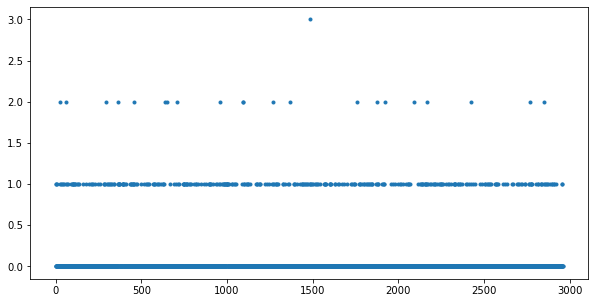

In [16]:
plt.plot(np.sum(parity == frames[good_frames, -32:], axis=1), '.')

In [17]:
decodes = []
errors = []
for f in frames[good_frames]:
    frame = b'\x00'*3 + bytes(f)
    errors.append(libfec.decode_rs_ccsds(frame, 0, 0, 0))
    decodes.append(np.frombuffer(frame, 'uint8'))
decodes = np.array(decodes)
errors = np.array(errors)

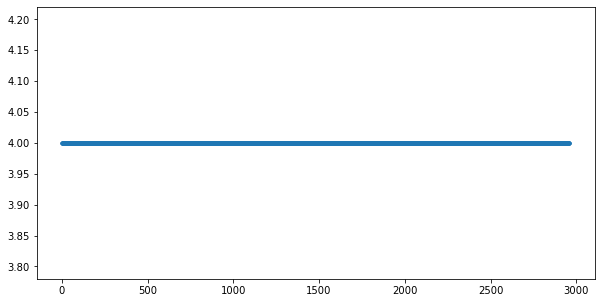

In [18]:
plt.plot(errors, '.')

In [19]:
print(strhex(decodes[0]))

cf fc 1d 03 79 16 0a 32 98 02 81 27 55 9a aa bb 
02 c5 00 00 f9 6b 00 00 00 00 a4 09 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 21 00 28 00 3e a7 02 20 ee 58 01 04 08 
24 00 00 63 00 00 00 62 00 00 00 07 92 92 00 00 
db cf 25 53 0f 00 00 08 c6 02 3b 12 95 0c 0c 30 
23 fe f0 58 28 ca 53 1a 10 1f 35 ac 4f da f8 00 
00 00 00 00 00 00 00 00 00 00 00 0f 38 2a 29 d9 
49 07 07 f9 0d 00 00 00 00 00 00 80 49 04 43 00 
00 00 00 ae 7f af ae ac af 00 00 00 00 04 04 ff 
c1 00 ff 11 00 96 55 ff 01 01 01 01 01 01 01 01 
01 01 76 8f 80 02 01 01 01 01 01 01 01 01 01 01 
01 01 01 01 01 aa aa aa aa aa aa aa aa aa aa aa 
aa aa aa aa aa ee ee ee ee ee ee ee ee ee ee d2 
1e ec e9 a3 5c ae bf 0f 1e 66 47 e3 46 82 ff bf 
de d4 a9 87 1e b9 26 67 58 f2 e9 4c f9 62 b1 


In [20]:
decodes = []
errors = []
for f in frames[good_frames]:
    frame = b'\x00'*4 + bytes(f[:-1])
    errors.append(libfec.decode_rs_ccsds(frame, 0, 0, 0))
    decodes.append(np.frombuffer(frame, 'uint8'))
decodes = np.array(decodes)
errors = np.array(errors)

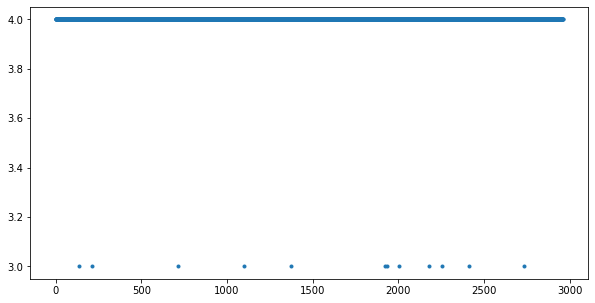

In [21]:
plt.plot(errors, '.')

In [22]:
print(strhex(decodes[0]))

b1 cf fc 1d 03 79 16 0a 32 98 02 81 27 55 9a aa 
bb 02 c5 00 00 f9 6b 00 00 00 00 a4 09 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 21 00 28 00 3e a7 02 20 ee 58 01 04 
08 24 00 00 63 00 00 00 62 00 00 00 07 92 92 00 
00 db cf 25 53 0f 00 00 08 c6 02 3b 12 95 0c 0c 
30 23 fe f0 58 28 ca 53 1a 10 1f 35 ac 4f da f8 
00 00 00 00 00 00 00 00 00 00 00 00 0f 38 2a 29 
d9 49 07 07 f9 0d 00 00 00 00 00 00 80 49 04 43 
00 00 00 00 ae 7f af ae ac af 00 00 00 00 04 04 
ff c1 00 ff 11 00 96 55 ff 01 01 01 01 01 01 01 
01 01 01 76 8f 80 02 01 01 01 01 01 01 01 01 01 
01 01 01 01 01 01 aa aa aa aa aa aa aa aa aa aa 
aa aa aa aa aa aa ee ee ee ee ee ee ee ee ee ee 
d2 1e ec e9 a3 5c ae bf 0f 1e 66 47 e3 46 82 ff 
bf de d4 a9 87 1e b9 26 67 58 f2 e9 4c f9 62 


In [23]:
decodes = []
errors = []
for f in frames[good_frames]:
    frame = bytes.fromhex('00cffc1d') + bytes(f[:-1])
    errors.append(libfec.decode_rs_ccsds(frame, 0, 0, 0))
    decodes.append(np.frombuffer(frame, 'uint8'))
decodes = np.array(decodes)
errors = np.array(errors)

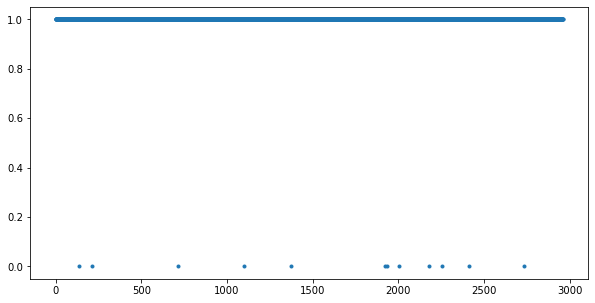

In [24]:
plt.plot(errors, '.')

In [25]:
np.all(decodes[:, 1:4] == np.frombuffer(bytes.fromhex('cffc1d'), 'uint8'))

True

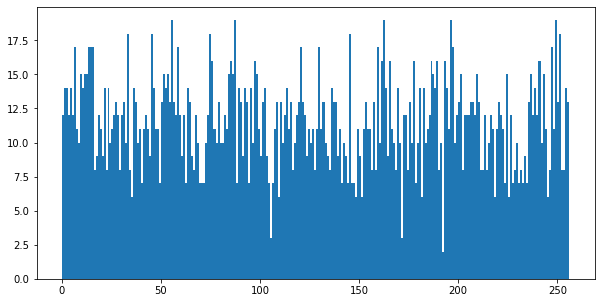

In [26]:
plt.hist(decodes[:, 0], bins=np.arange(0, 257));